## Observations and Insights 

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df.head()
study_results_df = pd.read_csv(study_results_path)
study_results_df.head()

# Combine the data into a single dataset
merge_df = pd.merge(study_results_df, mouse_metadata_df,how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_df.head()
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [253]:
# Check the number of mice.
num_mice = len(merge_df["Mouse ID"].unique())
num_mice

249

In [254]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_id = merge_df.loc[merge_df.duplicated(subset = ["Mouse ID","Timepoint" ]),"Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [255]:
merge_df.loc[merge_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [256]:
clean_data = merge_df[merge_df["Mouse ID"].isin(duplicate_id) == False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [257]:
# Clean data for null values
clean_data = clean_data.dropna(how="any")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [258]:
# Recheck the number of mice
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [259]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mean = tumor_volume_mean.map("{:,.2f}".format)

tumor_volume_median = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
median = tumor_volume_median.map("{:,.2f}".format)

tumor_variance = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
variance = tumor_variance.map("{:,.2f}".format)

tumor_deviation = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
deviation = tumor_deviation.map("{:,.2f}".format)

tumor_sem = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
std_error = tumor_sem.map("{:,.2f}".format)

df = pd.DataFrame({"Tumor Volume Mean":mean,"Tumor Volume Median":median, 
                   "Tu-Vo Variance": variance,
                  "Tu-Vo Deviation": deviation, "Tu-Vo SEM": std_error})
# Preview DataFrame
df


,Tumor Volume Mean,Tumor Volume Median,Tu-Vo Variance,Tu-Vo Deviation,Tu-Vo SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [260]:
summary_df = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean", "median", "var", "std", "sem"]})
summary_df
                                                      

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

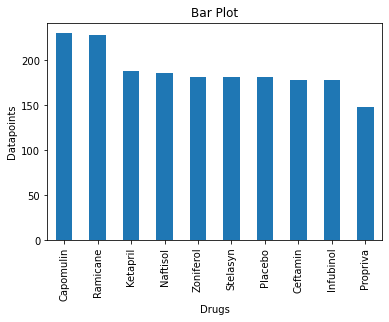

In [261]:


# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
drug_count = clean_data["Drug Regimen"].value_counts()
drug_count.plot(kind="bar")


#  There should be a single bar per regimen


plt.title("Bar Plot")
plt.xlabel("Drugs")
plt.ylabel("Datapoints")
plt.show()


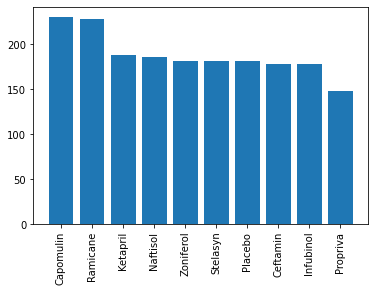

In [262]:
# Generate identical bar plot using pyplot instead of pandas.
x_axis = drug_count.index.values
y_axis = drug_count.values
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 90)
plt.show()

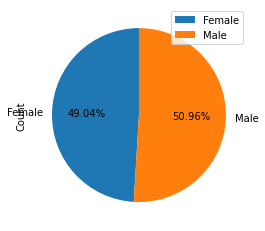

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pieplotpanda = pd.DataFrame(clean_data.groupby(["Sex"]).count()).reset_index()


pieplotpanda = pieplotpanda[["Sex","Mouse ID"]]
pieplotpanda = pieplotpanda.rename(columns={"Mouse ID": "Count"})


pieplotpanda.plot(kind='pie', y = "Count", autopct='%1.2f%%', startangle=90, labels=pieplotpanda['Sex'])

([<matplotlib.patches.Wedge at 0x22067d54ac0>,
 [Text(-1.0995024239828841, 0.03308201408261592, 'Females'),
  Text(1.0995024239828841, -0.03308201408261557, 'Males')],
 [Text(-0.5997285948997548, 0.018044734954154134, '49.04%'),
  Text(0.5997285948997549, -0.018044734954153943, '50.96%')])

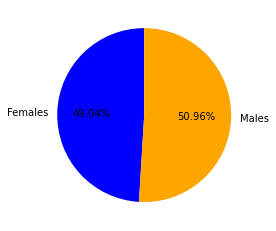

In [264]:
# Generate identical pie plot using pyplot
piepyplot = (clean_data.groupby(["Sex"])["Age_months"].count()).tolist()

plt.pie(piepyplot, labels=["Females","Males"], startangle=90, colors=["blue","orange"], autopct="%1.2f%%")


## Quartiles, Outliers and Boxplots

In [265]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

tumor_lastpoint = clean_data.groupby(["Mouse ID"]).max()["Timepoint"]
tumor_lastpoint = tumor_lastpoint.reset_index()
tumor_lastpoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data= tumor_lastpoint.merge(clean_data, on= ["Mouse ID", "Timepoint"], how="left")
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [266]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
filtered_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") | (clean_data["Drug Regimen"] == "Ceftamin") | (clean_data["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df
    



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


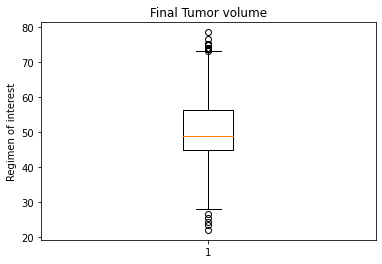

In [267]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
tumor_vol = clean_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor volume')
ax1.set_ylabel('Regimen of interest')
ax1.boxplot(tumor_vol)
plt.show()


## Line and Scatter Plots

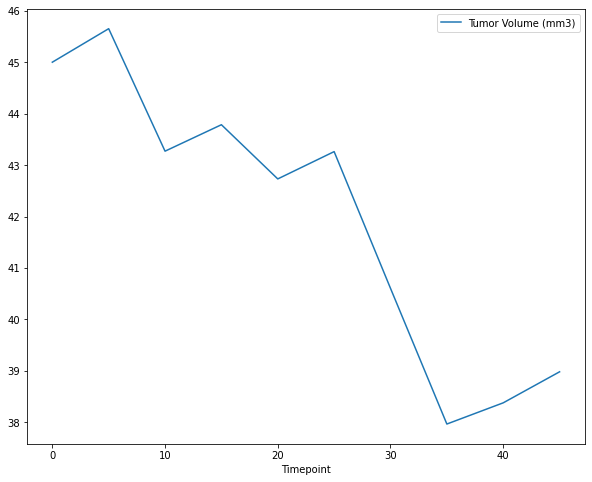

In [268]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
capomulin2 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin2 = capomulin2.reset_index()
singlecapomulin = capomulin2.loc[capomulin2["Mouse ID"] == "b128"]
singlecapomulin = singlecapomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
singlecapomulin = singlecapomulin.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
singlecapomulin.set_index('Timepoint').plot(figsize=(10, 8))

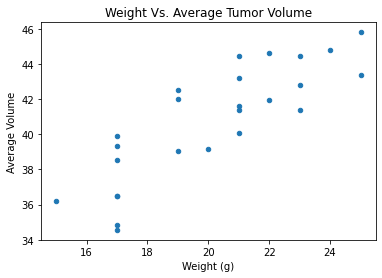

In [269]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
redcapomulin = capomulin2.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avecap = pd.DataFrame(redcapomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avecap = avecap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avecap = avecap.set_index('Mouse ID')
avecap.plot(kind="scatter", x="Weight (g)", y="Average Volume",
              title="Weight Vs. Average Tumor Volume")


## Correlation and Regression

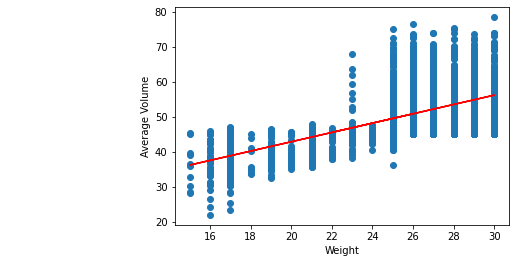

In [270]:

x_values=clean_data["Weight (g)"]
y_values=clean_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Volume')
plt.show()

In [271]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=clean_data["Weight (g)"]
y_values=clean_data["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.59


# Observations and Insights

In [272]:
#Extremely difficult but end of it understoond everything